This notebook was an exercise for me to plot continuum-subtracted spectra. For the process I did to find the power-law constants, see `old-codes/very-old-codes/Spectra-Comp.ipynb`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from diskfit import utils
from scipy.optimize import minimize
from glob import glob

In [2]:
spec = glob('../spectra/*')
z_list = [0.0563, 0, 0.01513, 0.04573]
names = ['AT2020zso', 'ASASSN-18pg', 'AT2019qiz', 'AT2018hyz']
params = [[ 8.74764134e-08, -2.43552278e+00,  7.81167947e-17],
          [-5.69314816e-12, -1.78149645e-04,  5.68527108e-12],
          [-2.57426216e-06, -4.41129826e+00,  8.08577702e-16],
          [ 2.63655176e-14, -3.89921358e-01, -5.33932829e-16]]

def graph_more():
    plt.axvline(6563, label=r'H$\alpha$', color='red')
    plt.axvline(4861, label=r'H$\beta$', color='cyan')
    plt.axhline(0, linestyle='--')
    plt.xlabel(r'Rest $\lambda$ ($\AA$)'); plt.ylabel('$f_{\lambda}$')
    plt.legend(loc=1); plt.show()

def power_law(wl, A, k, C):
    return A*(wl/(1+z))**k+C

wavemin, wavemax = 6340, 6800

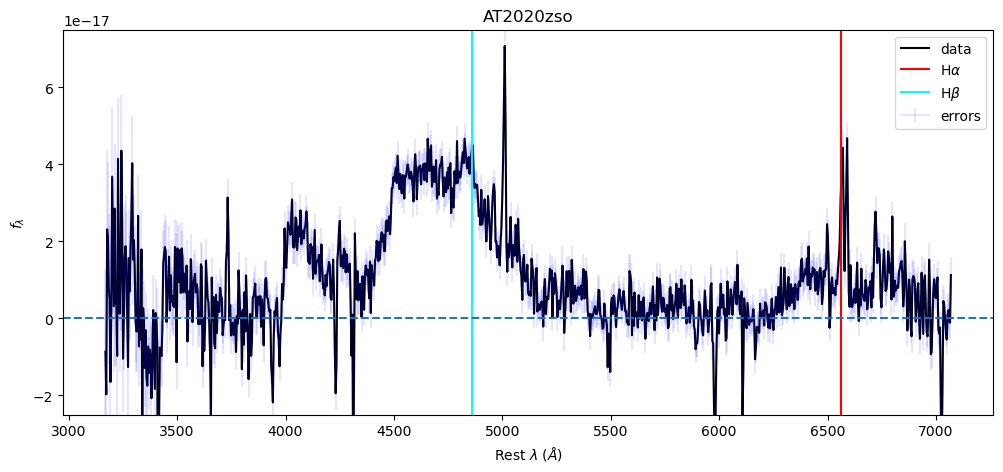

In [20]:
wl, flux, err = utils.readspec(spec[0]); z = z_list[0]

plt.figure(figsize=(12, 5))
plt.plot(wl/(1+z), flux - power_law(wl, *params[0]) + 1.5e-18, label='data', c='k')
plt.errorbar(wl/(1+z), flux - power_law(wl, *params[0]) + 1.5e-18, yerr=err, c='b', alpha=0.1, label='errors')
plt.ylim(-.25e-16, .75e-16)#; plt.xlim(6200, 7000)
plt.title(f'{names[0]}'); graph_more()

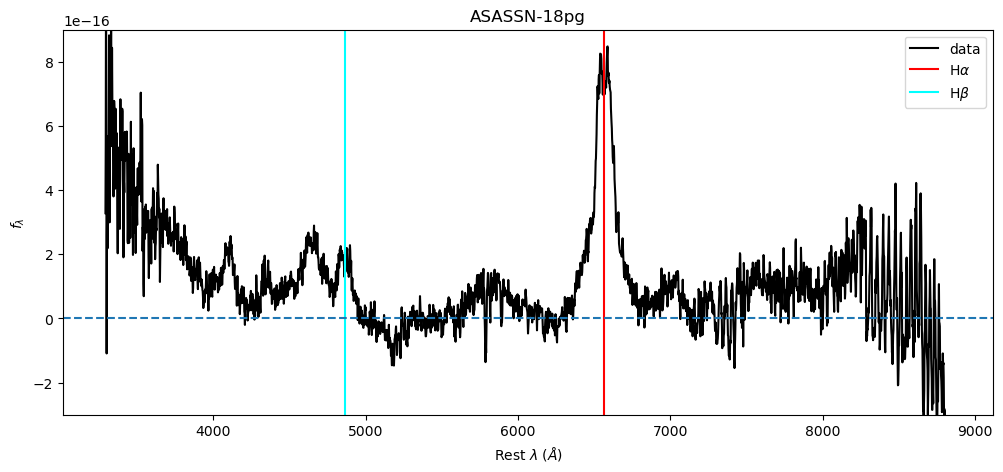

In [21]:
data = pandas.read_csv(spec[1], sep='\s+', header=None)
data.columns = ['Instrument', 'Date', 'wl', 'flux']
wl, flux = data['wl'], data['flux']; z = z_list[1] # the redshift used in a paper was 0.017392
    
plt.figure(figsize=(12, 5))
plt.plot(wl/(1+z), flux - power_law(wl, *params[1]) + 5e-17, label='data', c='k')
plt.ylim(-.3e-15, .9e-15); plt.title(f'{names[1]}'); graph_more()

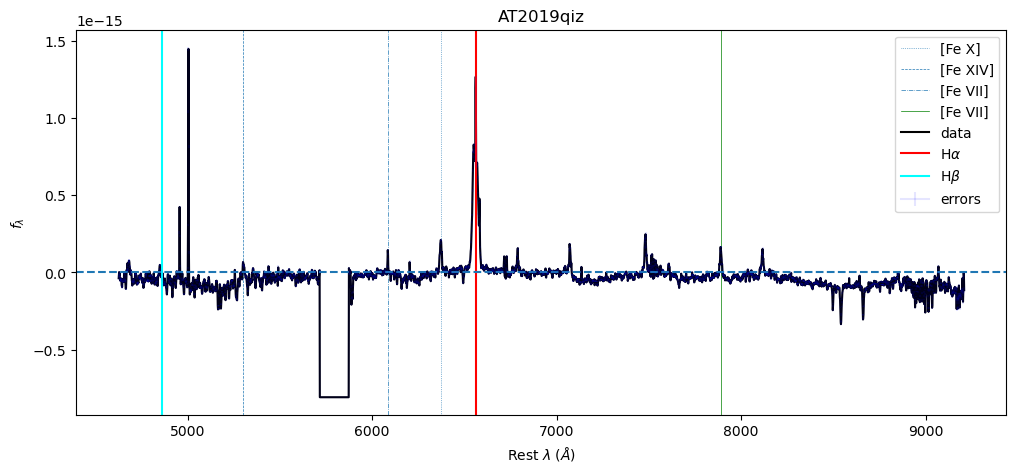

In [16]:
wl, flux, err = utils.readspec(spec[2]); z = z_list[2]

plt.figure(figsize=(12, 5))
plt.axvline(6374, ls='dotted', linewidth=0.5, label='[Fe X]')
plt.axvline(5302, ls='--', linewidth=0.5, label='[Fe XIV]')
plt.axvline(6087, ls='-.', linewidth=0.5, label='[Fe VII]')
plt.axvline(7891, linewidth=0.5, c='g', label='[Fe VII]')
plt.plot(wl/(1+z), flux - power_law(wl, *params[2]), label='data', c='k')
plt.errorbar(wl/(1+z), flux - power_law(wl, *params[2]), yerr=err, c='b', alpha=0.1, label='errors')
#plt.xlim(6400, 6700)
plt.title(f'{names[2]}'); graph_more()

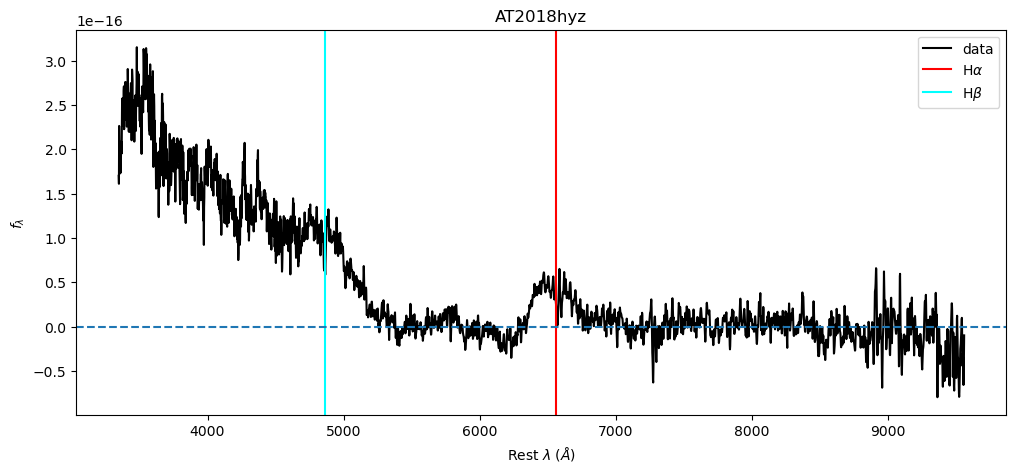

In [6]:
data = pandas.read_csv(spec[3], sep='\s+', header=None)
data.columns = ['wl', 'flux']
wl, flux = data['wl'], data['flux']; z = z_list[3]

plt.figure(figsize=(12, 5))
plt.plot(wl/(1+z), flux - power_law(wl, *params[3]), label='data', c='k')
plt.title(f'{names[3]}'); graph_more()